### Code to Run A Google Search API Request

In [ ]:
import os
import requests
import json

# Constants
API_KEY = "API_KEY"  # Replace with your Google API key
CSE_ID = "CSE_ID"  # Replace with your Custom Search Engine ID
SEARCH_QUERY = "my search"  # Replace with your search query
NUM_RESULTS = 100  # Total number of results needed (max 100)
SEARCH_FILE_FOLDER_PATH="Path/To/Output/File" #Path to your output file
def fetch_google_results(api_key, cse_id, query, num_results, date_restrict=None):
    """Fetches results from Google Custom Search JSON API."""
    results = []
    start_index = 1
    while len(results) < num_results:
        # Ensure not to request more than the remaining results needed
        max_results = min(num_results - len(results), 10)

        url = (
            f"https://www.googleapis.com/customsearch/v1"
            f"?key={api_key}&cx={cse_id}&q={query}&start={start_index}"
        )

        # Add date restriction if provided
        if date_restrict:
            url += f"&dateRestrict={date_restrict}"

        response = requests.get(url)
        if response.status_code != 200:
            print(f"Error: {response.status_code}, {response.text}")
            break

        data = response.json()
        if "items" not in data:
            print("No more items in response.")
            break

        # Append results
        for item in data["items"]:
            # Extract the publication date from the pagemap if available
            date = None
            if "pagemap" in item and "metatags" in item["pagemap"]:
                metatags = item["pagemap"]["metatags"]
                for tag in metatags:
                    date = tag.get("article:published_time") or tag.get("pubdate")
                    if date:
                        break

            results.append({
                "Title": item.get("title"),
                "Link": item.get("link"),
                "Description": item.get("snippet"),
                "Date": date or "N/A",  # Default to "N/A" if no date is found
            })

        # Update start index for the next batch (increment by 10)
        start_index += max_results

        # Google Custom Search JSON API allows a maximum of 100 results
        if start_index > 100:
            print("Reached maximum retrievable results (100).")
            break

    return results

def save_results_to_json(results, file_name, filename):
    """Saves results to a JSON file in the specified folder."""
    # Ensure the folder exists
    os.makedirs(file_name, exist_ok=True)

    # Create full file path
    file_path = os.path.join(file_name, filename)

    # Save results to JSON
    with open(file_path, mode='w', encoding='utf-8') as file:
        json.dump(results, file, indent=4, ensure_ascii=False)
    print(f"Results saved to {file_path}")

""" 
Fetch results with date restriction
Template - {letter}(d,m,y) + {number}(1,2,3,4,5,6,7,8,9) 
"""
DATE_RESTRICT = 'd2'


search_results = fetch_google_results(API_KEY, CSE_ID, SEARCH_QUERY, NUM_RESULTS, DATE_RESTRICT)

file_name = SEARCH_QUERY.replace(' ', '-')
output_filename = f"gsr-{file_name}.json"

# Save to JSON in the folder
if search_results:
    save_results_to_json(search_results, SEARCH_FILE_FOLDER_PATH, output_filename)
else:
    print("No results to save.")

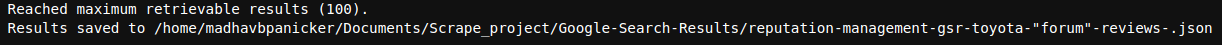
The above is a desired output example

For info on how to retrieve the Custom Search Engine ID and the API key visit the link:

https://developers.google.com/custom-search/v1/overview